In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Membaca dataset
data_nilai = pd.read_csv('dataset/Data Nilai Mata Kuliah Alumni Prodi Informatika Universitas Gunadarma_Ver2_Update - NilaiVer2_Update.csv')
data_profesi = pd.read_csv('dataset/Data Profil Alumni Prodi Informatika Universitas Gunadarma_Ver2.xlsx - ProfesiVer2_29092024.csv')

In [21]:
data_nilai.head(10)

,ID,KDMK,NAMA MK,JENIS,SKS,NILAI
0,Alumni001,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,Alumni002,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
2,Alumni003,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
3,Alumni004,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
4,Alumni005,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
5,Alumni006,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
6,Alumni007,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
7,Alumni008,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
8,Alumni009,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,C
9,Alumni010,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A


In [22]:
data_profesi.head(10)

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN
0,Alumni001,3.61,2020,System Analyst
1,Alumni002,3.55,2020,Software Quality Assurance Engineer
2,Alumni003,3.30,2020,Software Engineer
3,Alumni004,3.10,2020,Data Engineer
4,Alumni005,3.26,2020,Software Engineer
5,Alumni006,3.29,2020,IT Project Manager
6,Alumni007,3.25,2020,Data Analyst
7,Alumni008,3.36,2020,Network Engineer
8,Alumni009,3.67,2020,Software Quality Assurance Engineer
9,Alumni010,3.87,2020,Graphic Designer


In [23]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])

In [24]:
# Merge the two datasets based on 'ID' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='ID', how='inner')

In [25]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts

NILAI
A    23166
B    15206
C     1705
D      120
Name: count, dtype: int64

In [26]:
merged_data.head(10)

,ID,IPK,TAHUN LULUS,PROFESI PEKERJAAN,NAMA MK,SKS,NILAI
0,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 1,2,A
1,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 2,2,B
2,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PEMROGRAMAN 3,2,A
3,Alumni001,3.61,2020,System Analyst,ALGORITMA DAN PENGOLAHAN PARALEL,3,B
4,Alumni001,3.61,2020,System Analyst,ALGORITMA DEEP LEARNING,2,A
5,Alumni001,3.61,2020,System Analyst,ARSITEKTUR KOMPUTER,2,A
6,Alumni001,3.61,2020,System Analyst,BAHASA INDONESIA,2,B
7,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS 1,1,A
8,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS 2,1,B
9,Alumni001,3.61,2020,System Analyst,BAHASA INGGRIS BISNIS 1,1,A


In [27]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [28]:
# show all columns
data_nilai.columns

Index(['ID', 'KDMK', 'NAMA MK', 'JENIS', 'SKS', 'NILAI'], dtype='object')

In [29]:
data_profesi.columns

Index(['ID', 'IPK', 'TAHUN LULUS', 'PROFESI PEKERJAAN'], dtype='object')

In [30]:

# Pivots the merged data table to create a table with the student's NPM, IPK, Klasifikasi Profesi as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (NPM, IPK, Klasifikasi Profesi) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['ID', 'IPK', 'PROFESI PEKERJAAN'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [31]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,A,B,A,B,A,A,B,...,A,B,A,0,A,B,C,0,B,0
1,Alumni002,3.55,Software Quality Assurance Engineer,A,B,B,B,A,A,A,...,B,B,A,0,A,B,A,0,B,0
2,Alumni003,3.30,Software Engineer,A,B,A,B,A,A,A,...,A,C,A,C,0,B,B,0,B,0
3,Alumni004,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,B,B,B,0,B,A,0,B,0
4,Alumni005,3.26,Software Engineer,B,B,B,B,A,A,B,...,B,A,B,0,A,A,A,0,C,0
5,Alumni006,3.29,IT Project Manager,B,B,A,B,A,B,B,...,A,A,B,B,0,B,A,0,B,0
6,Alumni007,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,C,B,0,A,A,0,B,0
7,Alumni008,3.36,Network Engineer,B,B,A,B,B,A,B,...,A,B,A,B,0,B,A,0,B,0
8,Alumni009,3.67,Software Quality Assurance Engineer,C,A,A,A,A,A,B,...,A,A,B,A,0,A,A,0,B,0
9,Alumni010,3.87,Graphic Designer,A,B,A,B,A,A,A,...,A,A,A,A,0,A,A,0,A,0


In [32]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1,}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'PROFESI', and 'PEKERJAAN'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['NPM', 'IPK', 'PROFESI', 'PEKERJAAN'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
5,Alumni006,3.29,IT Project Manager,3,3,4,3,4,3,3,...,4,4,3,3,0,3,4,0,3,0
6,Alumni007,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,2,3,0,4,4,0,3,0
7,Alumni008,3.36,Network Engineer,3,3,4,3,3,4,3,...,4,3,4,3,0,3,4,0,3,0
8,Alumni009,3.67,Software Quality Assurance Engineer,2,4,4,4,4,4,3,...,4,4,3,4,0,4,4,0,3,0
9,Alumni010,3.87,Graphic Designer,4,3,4,3,4,4,4,...,4,4,4,4,0,4,4,0,4,0


In [33]:
pivoted_grades_filled

INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,Alumni001,3.61,System Analyst,4,3,4,3,4,4,3,...,4,3,4,0,4,3,2,0,3,0
1,Alumni002,3.55,Software Quality Assurance Engineer,4,3,3,3,4,4,4,...,3,3,4,0,4,3,4,0,3,0
2,Alumni003,3.30,Software Engineer,4,3,4,3,4,4,4,...,4,2,4,2,0,3,3,0,3,0
3,Alumni004,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,3,3,3,0,3,4,0,3,0
4,Alumni005,3.26,Software Engineer,3,3,3,3,4,4,3,...,3,4,3,0,4,4,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Alumni506,3.70,Software Quality Assurance Engineer,4,3,4,3,3,4,4,...,4,4,4,3,0,4,4,4,4,4
506,Alumni507,3.87,Software Engineer,4,4,4,3,4,4,3,...,4,4,4,4,0,3,4,4,4,4
507,Alumni508,3.62,Software Engineer,4,3,4,4,4,3,3,...,3,3,3,4,0,4,4,0,3,4
508,Alumni509,3.48,System Analyst,4,3,4,4,3,3,3,...,0,3,2,3,0,2,4,4,4,4


In [34]:
# Get a random id from the data
random_id = pivoted_grades_filled['ID'].sample().values[0]

print(f"Randomly selected NPM: {random_id}")

# Get the data for this random NPM
random_student_data = pivoted_grades_filled[pivoted_grades_filled['ID'] == random_id]

# Display the data for the randomly selected student
random_student_data

Randomly selected NPM: Alumni301


INDEX,ID,IPK,PROFESI PEKERJAAN,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
300,Alumni301,3.45,System Analyst,4,3,3,4,4,3,4,...,4,3,3,4,0,4,4,0,4,3


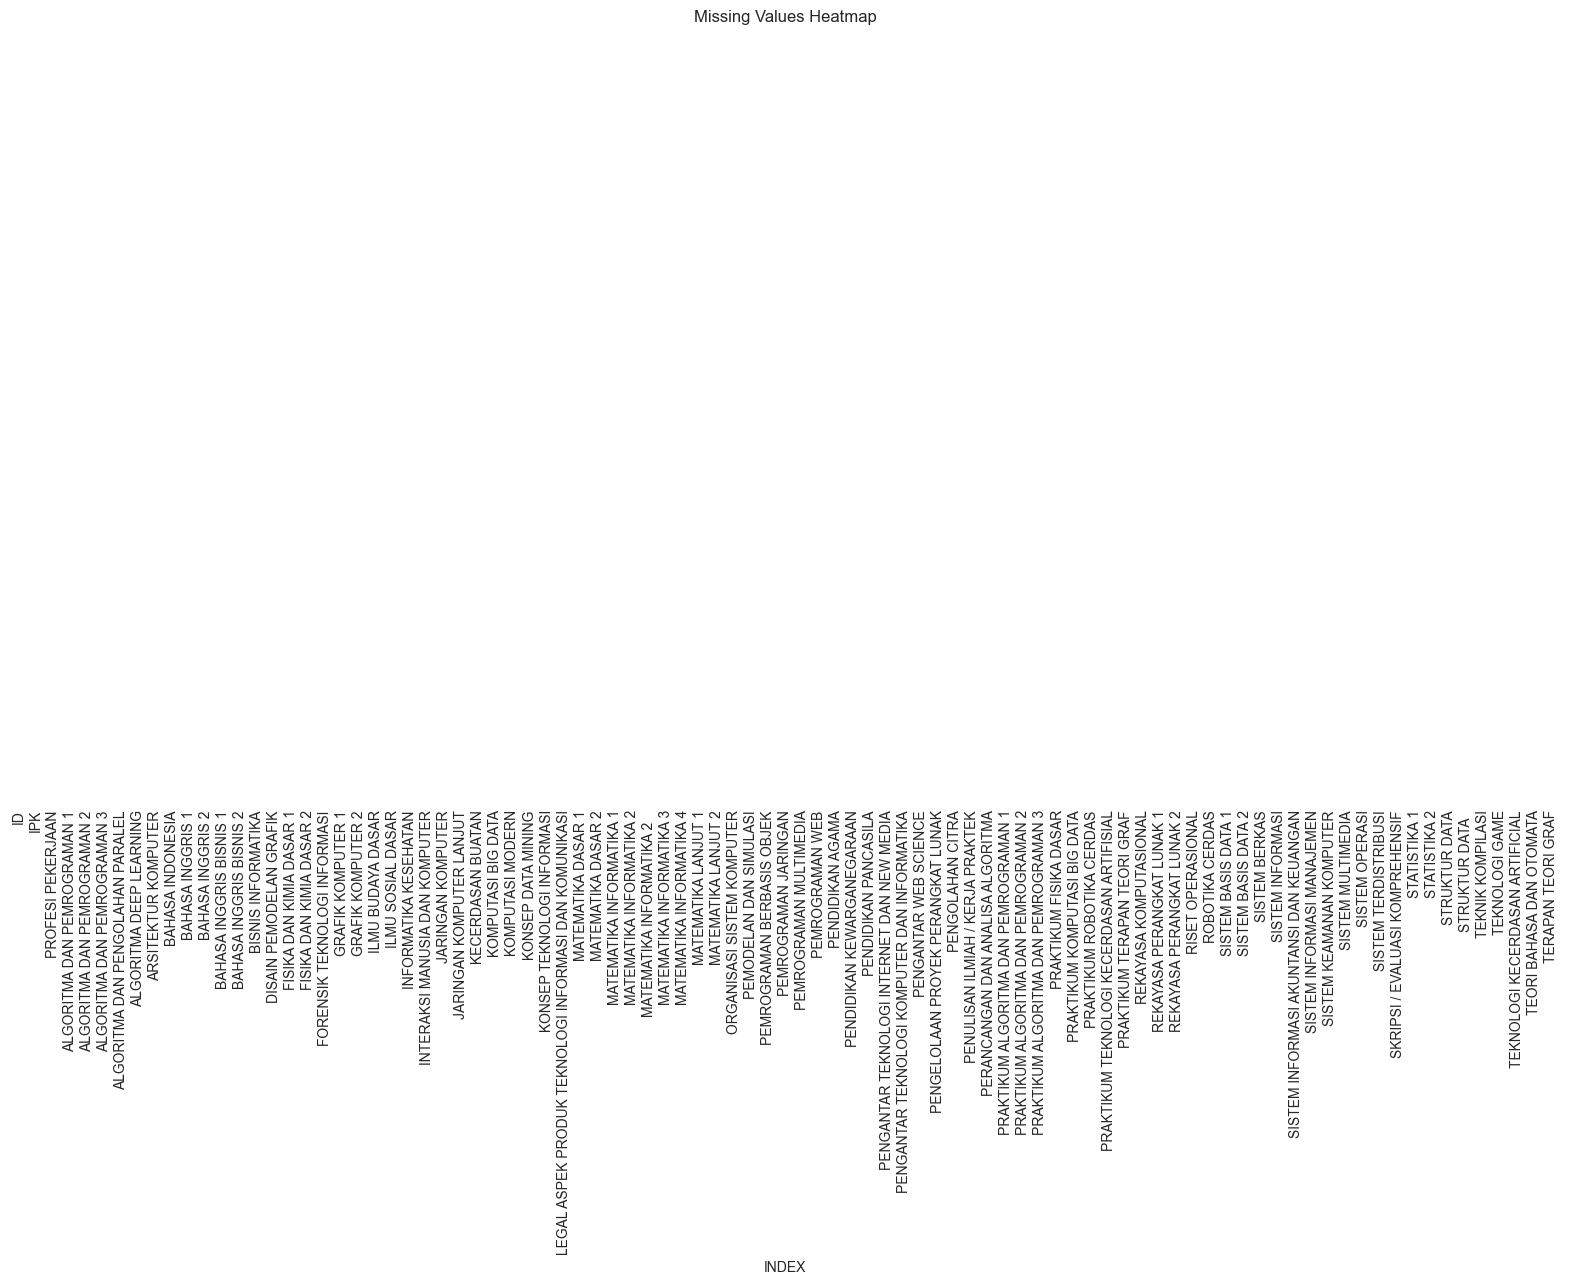

In [35]:
# Create a binary mask where 0 is True and non-zero is False
mask = pivoted_grades_filled.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

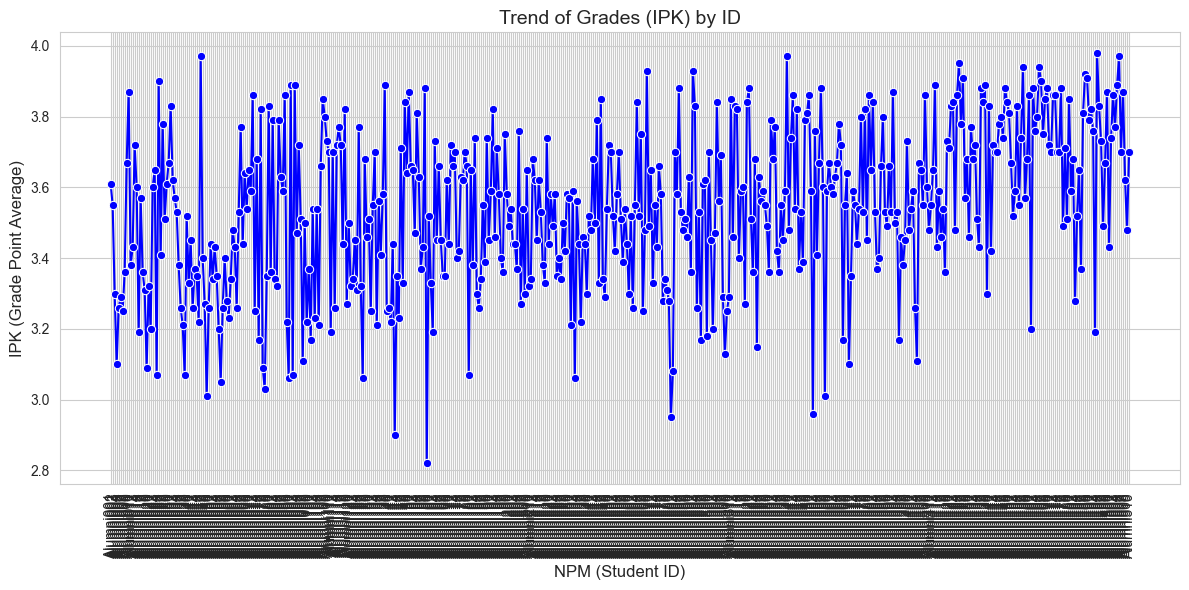

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivoted_grades_filled, x='ID', y='IPK', marker='o', color='b')

# Customize the plot
plt.title('Trend of Grades (IPK) by ID', fontsize=14)
plt.xlabel('NPM (Student ID)', fontsize=12)
plt.ylabel('IPK (Grade Point Average)', fontsize=12)
plt.xticks(rotation=90)  # Rotate the NPM labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


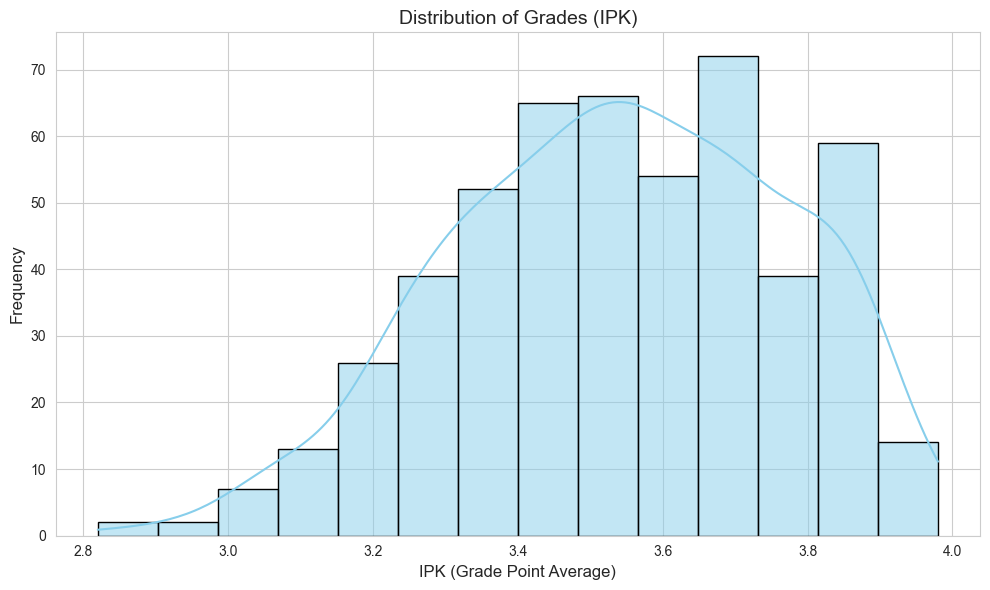

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=pivoted_grades_filled, x='IPK', kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Grades (IPK)', fontsize=14)
plt.xlabel('IPK (Grade Point Average)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Modelling with Random Forest, KNN, Logistic Regression, SVM, Naive Bayes, and CatBoost.

/home/riq/miniconda3/envs/eksplorasi-wgan/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


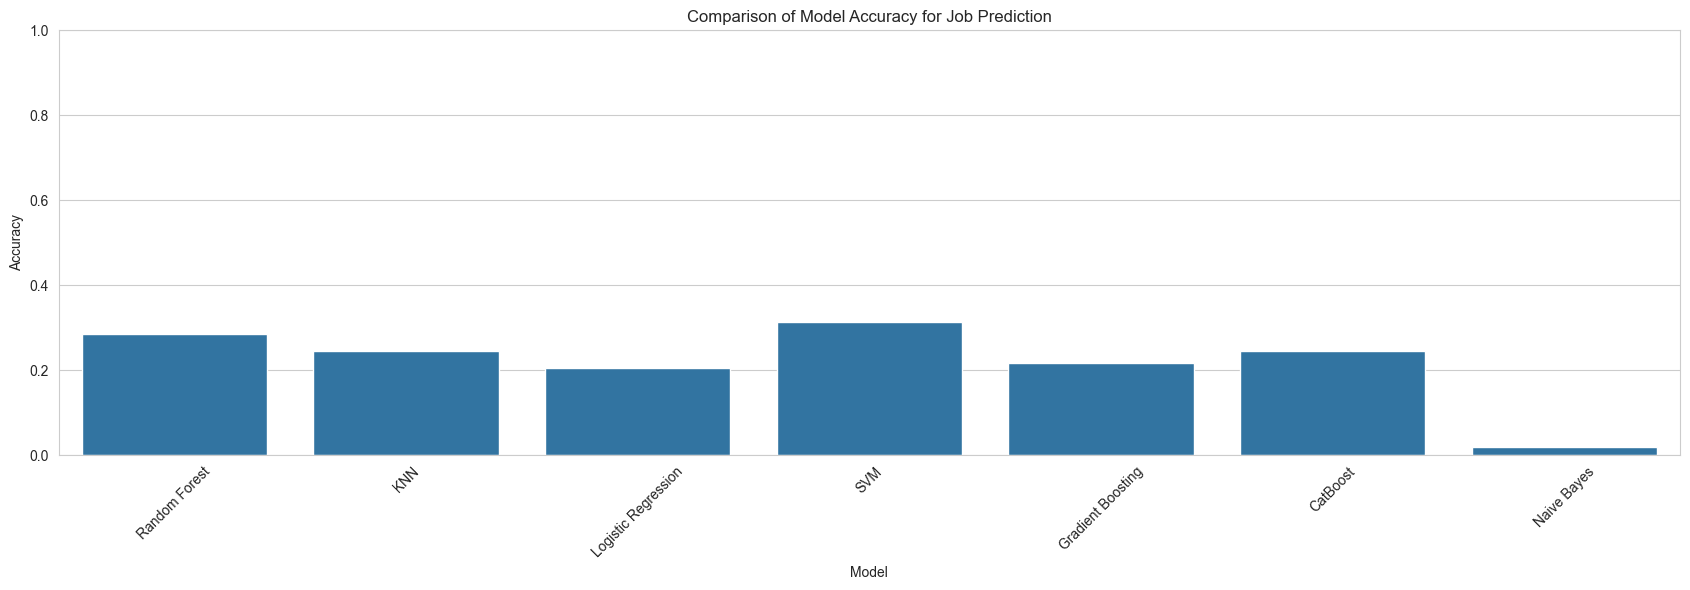

In [41]:
# Required imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pivoted_grades_filled is a DataFrame you have prepared already
# Encode the target variable 'Klasifikasi Profesi'
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_encoded'] = label_encoder.fit_transform(pivoted_grades_filled['PROFESI PEKERJAAN'])

# Define feature set and target variable
X = pivoted_grades_filled.drop(['ID', 'PROFESI PEKERJAAN', 'Profesi_encoded'], axis=1)
y = pivoted_grades_filled['Profesi_encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Naive Bayes": GaussianNB(),
}

# Train models and collect results
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Convert results to DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Plot the results
plt.figure(figsize=(17, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Comparison of Model Accuracy for Job Prediction')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/home/riq/miniconda3/envs/eksplorasi-wgan/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1200x800 with 0 Axes>

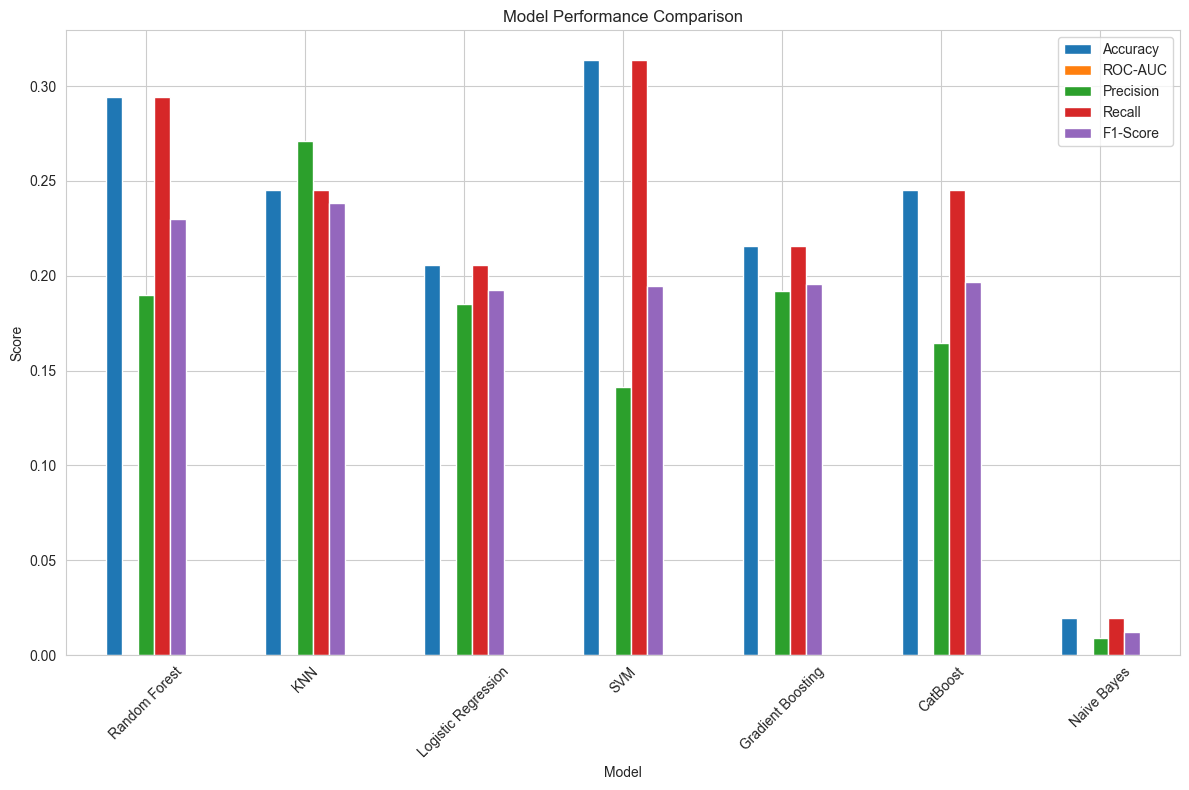

In [42]:
# Required imports
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Initialize lists to store results
model_performance = []

# Train models and collect results
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Only calculate ROC-AUC if the model supports `predict_proba`
    if hasattr(model, "predict_proba"):
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        except ValueError:
            roc_auc = np.nan  # Handle cases where the number of classes is mismatched
    else:
        roc_auc = np.nan  # Not all models provide predict_proba (e.g., SVM)

    # Classification report (precision, recall, F1-score)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append to the performance list
    model_performance.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
    })

# Convert the results to DataFrame
performance_df = pd.DataFrame(model_performance)

# Plot the performance metrics
plt.figure(figsize=(12, 8))
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 6

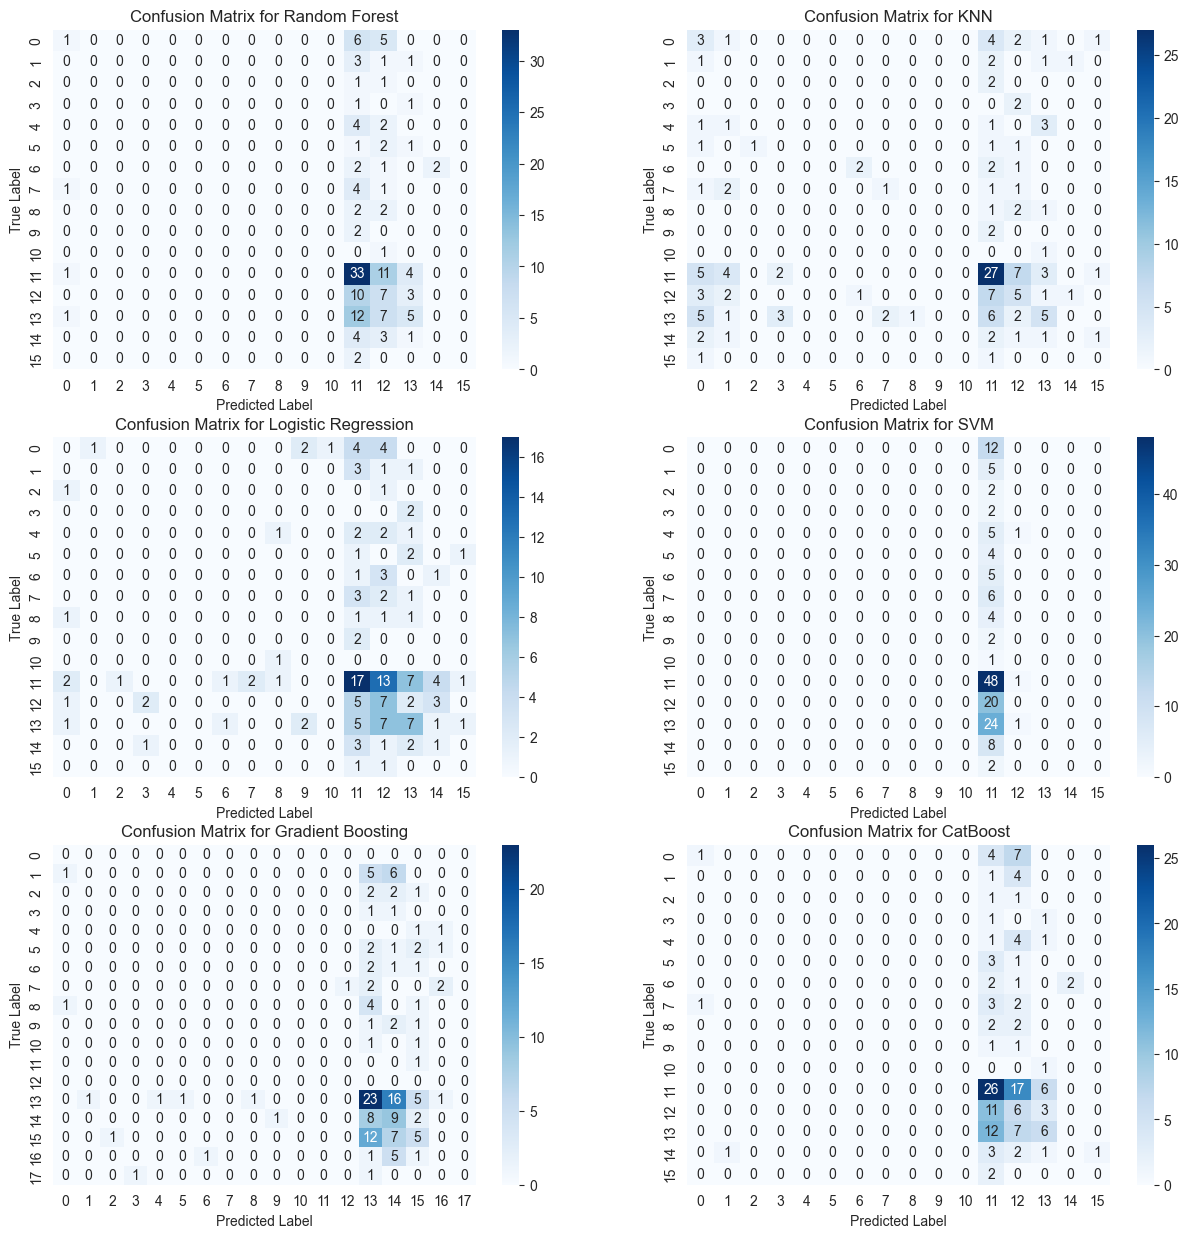

In [40]:
# Plot confusion matrix for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()
